In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_kOBLwZA (1).csv")
test = pd.read_csv("test_t02dQwI (1).csv")
sample = pd.read_csv("SampleSubmission_TmnO39y (2).txt")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [8]:
train.shape

(8523, 12)

In [9]:
test.shape

(5681, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
age   degree    salary
54      btech    8766
65      be       8650
35      bsc      9876


age   degree_b.tech  degree_be degree_bsc  salar
54         1               0        0        8766
65
35

salry = 0.87 + 8(Age) + 0.6(degree_b.tech)+ 2.7(degree_be) +0.4(degree_bsc)


age     degree    salary
78        bsc       ?
43        btech     ?




age   degree    salary
54      btech    8766
65      be       8650
35      bsc      9876
78      bsc       ?
43      btech     ?






SyntaxError: invalid syntax (<ipython-input-11-ea1c06e53c7d>, line 1)

In [12]:
df = pd.concat([train,test])

In [13]:
df.shape

(14204, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [15]:
df.describe(include="all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4
top,Low Fat,FDM60,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN


In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [18]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
df["Item_Fat_Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

In [20]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [22]:
df["Item_Identifier"].apply(lambda x :x[:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [23]:
df["Item_Identifier_type"] = df["Item_Identifier"].apply(lambda x :x[:2])

In [24]:
df["Item_Identifier_type"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_type, dtype: int64

In [25]:
df["Item_MRP"].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

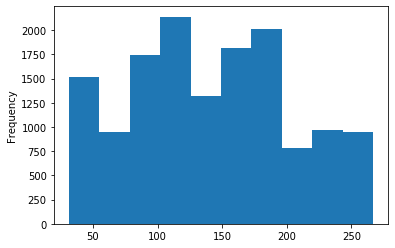

In [26]:
df["Item_MRP"].plot(kind = "hist")

In [27]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
df["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [29]:
df["Item_Visibility"].mean()

0.06595278007399323

In [30]:
df["Item_Visibility"].median()

0.05402053650000001

In [31]:
df["Item_Visibility"].sum()/((df.shape[0])-879)

0.0703034362604878

In [32]:
df["Item_Visibility"].replace({0.000000:df["Item_Visibility"].sum()/((df.shape[0])-879)}).value_counts()

0.070303    879
0.077169      3
0.076841      3
0.076483      3
0.077290      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.115072      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [33]:
df["Item_Visibility"].replace({0.000000:df["Item_Visibility"].sum()/((df.shape[0])-879)}, inplace= True)

In [34]:
df["Item_Weight"].isna().sum()

2439

In [35]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [36]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [37]:
df["Item_Weight"] = df.groupby('Item_Type').Item_Weight.transform(lambda x : x.fillna(x.mean()))

In [38]:
df["Item_Weight"].isna().sum()

0

In [39]:
df["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [40]:
df["Outlet_Establishment_Age"] = 2019 - df["Outlet_Establishment_Year"]

In [41]:
df["Outlet_Establishment_Age"].unique()

array([20, 10, 21, 32, 34, 17, 12, 22, 15])

In [42]:
del df["Outlet_Establishment_Year"]

In [43]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Item_Identifier_type', 'Outlet_Establishment_Age'],
      dtype='object')

In [44]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [45]:
df["Outlet_Location_Type"].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [46]:
df["Outlet_Size"].isna().sum()

4016

In [47]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [48]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [49]:
df["Outlet_Size"] = df.groupby("Outlet_Location_Type").Outlet_Size.transform(lambda x : x.fillna(x.mode()[0]))

In [50]:
df["Outlet_Size"].isna().sum()

0

In [51]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [52]:
df.isna().sum()

Item_Fat_Content               0
Item_Identifier                0
Item_MRP                       0
Item_Outlet_Sales           5681
Item_Type                      0
Item_Visibility                0
Item_Weight                    0
Outlet_Identifier              0
Outlet_Location_Type           0
Outlet_Size                    0
Outlet_Type                    0
Item_Identifier_type           0
Outlet_Establishment_Age       0
dtype: int64

In [53]:
df_num_col = df.select_dtypes(include = np.number)

In [54]:
df_cat_col = df.select_dtypes(exclude = np.number)

In [55]:
df_cat_col.drop(columns = "Item_Identifier")

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_type
0,Low Fat,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Tier 1,Medium,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,Tier 3,Medium,Grocery Store,FD
4,Low Fat,Household,OUT013,Tier 3,High,Supermarket Type1,NC
...,...,...,...,...,...,...,...
5676,Regular,Snack Foods,OUT046,Tier 1,Small,Supermarket Type1,FD
5677,Regular,Starchy Foods,OUT018,Tier 3,Medium,Supermarket Type2,FD
5678,Low Fat,Health and Hygiene,OUT045,Tier 2,Small,Supermarket Type1,NC
5679,Regular,Canned,OUT017,Tier 2,Small,Supermarket Type1,FD


In [56]:
df_cat_num_col = pd.get_dummies(df_cat_col.drop(columns = "Item_Identifier"))

In [57]:
df_preprocced = pd.concat([df_cat_num_col,df_num_col,df["Item_Identifier"],df["Outlet_Identifier"]],axis="columns")

In [58]:
train_preprocessed = df_preprocced[df_preprocced["Item_Outlet_Sales"].notna()]

In [59]:
test_preprocessed = df_preprocced[df_preprocced["Item_Outlet_Sales"].isna()]

In [60]:
test_preprocessed.shape

(5681, 48)

In [61]:
del test_preprocessed["Item_Outlet_Sales"]

In [62]:
test_preprocessed.shape

(5681, 47)

In [63]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Item_Identifier_type_DR,Item_Identifier_type_FD,Item_Identifier_type_NC,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,107.8622,0.007565,20.750000,20,FDW58,OUT049
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,87.3198,0.038428,8.300000,12,FDW14,OUT017
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,241.7538,0.099575,14.600000,21,NCN55,OUT010
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,155.0340,0.015388,7.315000,12,FDQ58,OUT017
4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,234.2300,0.118599,13.238358,34,FDY38,OUT027


In [64]:
X = train_preprocessed.drop(columns=["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"])

In [65]:
y = train_preprocessed["Item_Outlet_Sales"]

In [66]:
y.shape

(8523,)

In [72]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [73]:
train_X.shape

(5966, 45)

In [74]:
test_X.shape

(2557, 45)

In [69]:
linear = LinearRegression()
linear.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
train_X.shape

NameError: name 'train_X' is not defined

In [70]:
linear.coef_

array([  -27.17040191,    27.17040191,   -21.43250063,    98.38973955,
          -7.67400576,    34.80841555,   -56.27292319,   -52.02344935,
          30.88446423,  -186.47357422,    30.10711839,   -36.25854695,
          11.36000547,   -30.0089695 ,   306.55229329,    -3.00956218,
        -180.68936757,    61.74086287,  -653.03682008,   -82.30525613,
         118.53185863,    49.25357908,  -445.29074806,   679.2107635 ,
         171.36920991,  -112.38778125,   171.86937067,   102.78582372,
        -170.63555367,   177.51328729,    -6.87773362,   -82.30525613,
         178.21334622,   -95.9080901 , -1098.32756814,   369.86322555,
          49.25357908,   679.2107635 ,   106.40803344,   -70.24763539,
         -36.16039806,    15.35607597,   191.79424577,     3.16472534,
          17.44569834])

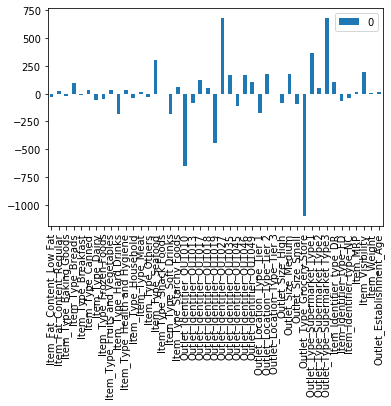

In [71]:
pd.DataFrame(linear.coef_,train_X.columns).plot(kind = "bar")

In [72]:
train_predict = linear.predict(train_X)

In [73]:
test_predict = linear.predict(test_X)

In [74]:
np.sqrt(mean_squared_error(train_predict,train_y))

1111.1080921146768

In [75]:
np.sqrt(mean_squared_error(test_predict,test_y))

1167.6365800072672

In [118]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type3,Item_Identifier_type_DR,Item_Identifier_type_FD,Item_Identifier_type_NC,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,107.8622,0.007565,20.750000,20,FDW58,OUT049
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,87.3198,0.038428,8.300000,12,FDW14,OUT017
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,241.7538,0.099575,14.600000,21,NCN55,OUT010
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,155.0340,0.015388,7.315000,12,FDQ58,OUT017
4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,234.2300,0.118599,13.238358,34,FDY38,OUT027


In [119]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X.drop(columns=["Item_Identifier","Outlet_Identifier"]))
    test_pred_df = pd.DataFrame(test_hack_predict,columns= ["Item_Outlet_Sales"])
    result = pd.concat([test_X[["Item_Identifier", "Outlet_Identifier"]],test_pred_df] ,axis = 1)
    result.to_csv(filename,index = False)
    

In [133]:
def model_fit_poly(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    #pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    #print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    #print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X)
    test_pred_df = pd.DataFrame(test_hack_predict,columns= ["Item_Outlet_Sales"])
    result = pd.concat([test_preprocessed[["Item_Identifier", "Outlet_Identifier"]],test_pred_df] ,axis = 1)
    result.to_csv(filename,index = False)

Train RMSE :  1111.1080921146768
Test RMSE :  1167.6365800072672


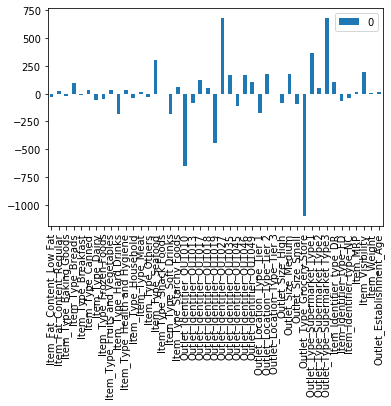

In [129]:
model_fit(linear,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"linear_solution.csv")

In [130]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(train_X)
X_test_poly = poly_reg.fit_transform(test_X)

X_poly = poly_reg.fit_transform(X)
X_test_poly = poly_reg.fit_transform(test_preprocessed.drop(columns=["Item_Identifier", "Outlet_Identifier"]))

pol_reg = LinearRegression()


In [135]:
type(X_poly)

numpy.ndarray

In [131]:
X_train_poly.shape

(5966, 1081)

In [134]:
model_fit_poly(pol_reg,X_train_poly,X_test_poly,train_y,test_y,X_poly,y,X_test_poly,"linear_poly.csv")

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(train_X)
X_test_poly = poly_reg.fit_transform(test_X)
pol_reg = LinearRegression()

In [87]:
X_train_poly.shape

(5966, 17296)

In [ ]:
#model_fit(linear,X_train_poly,X_test_poly,train_y,test_y,X,y,"linear_poly.csv")

In [136]:
lass = Lasso(alpha=0.1, normalize=True)

Train RMSE :  1111.8149500387449
Test RMSE :  1165.6415452457716


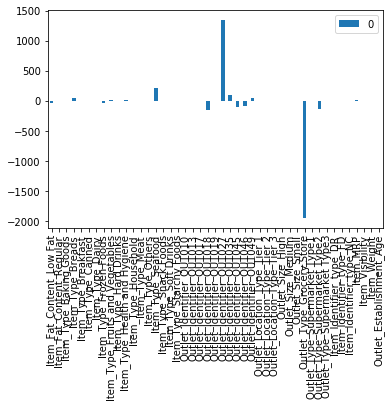

In [137]:
model_fit(lass,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"lasso_solution.csv")

Train RMSE :  1137.328227685012
Test RMSE :  1201.0262694502112


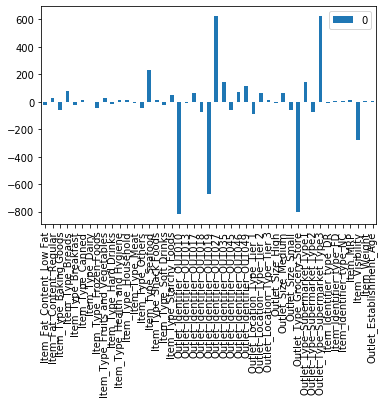

In [138]:
ridge = Ridge(alpha=0.3, normalize=True)
model_fit(ridge,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"ridge_solution.csv")

In [114]:
elastic = ElasticNet(alpha=0.2, l1_ratio=0.2, normalize=True)

Train RMSE :  1674.6790643366055
Test RMSE :  1773.3695859411573


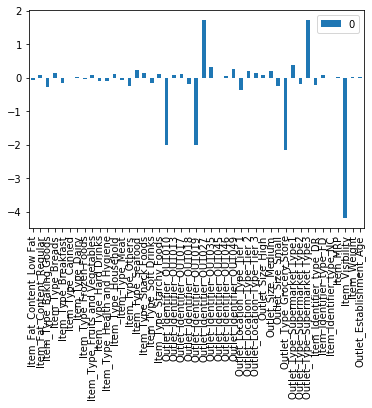

In [115]:
model_fit(elastic,train_X,test_X,train_y,test_y,X,y,test_preprocessed,"ridge_solution.csv")

In [111]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(train_X, train_y)
clf.score(X, y) 

0.5628386183305735

In [112]:
clf.alpha_

10.0